# DIGITAL IMAGE PROCESSING
## Assignment - 4

### ~Aniketh Atmakuri (2021112008)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2 as cv2
import librosa
from tqdm import tqdm

## Task - 1


### Part - (a)

In [4]:
# Loading Grayscale Image
image = cv2.imread("/home/aniketh/Desktop/Sem_7/DIP/A4/Images/grayscale-flower.png", cv2.IMREAD_GRAYSCALE)

# Binary Thresholding
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

### Part - (b)

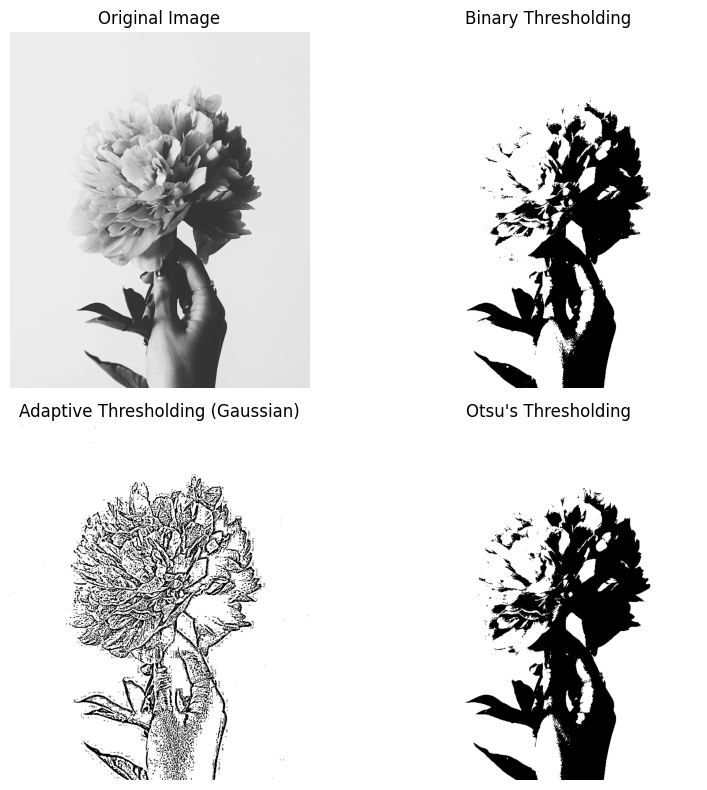

In [5]:
# Plotting original and segmented images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Binary Thresholding
plt.subplot(2, 3, 2)
plt.imshow(binary_thresh, cmap='gray')
plt.title("Binary Thresholding")
plt.axis("off")

# Adaptive Thresholding (Gaussian)
plt.subplot(2, 3, 4)
plt.imshow(adaptive_thresh_gaussian, cmap='gray')
plt.title("Adaptive Thresholding (Gaussian)")
plt.axis("off")

# Otsu's Thresholding
plt.subplot(2, 3, 5)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis("off")

plt.tight_layout()
plt.show()

### Part - (c)

Otsu's Thresholding provided the best segmentation for the image, as it effectively separates the flower and hand from the background with well-defined object boundaries. However, Adaptive Thresholding highlights finer details, though it introduces significant noise, making it less suitable for clean segmentation. Binary thresholding doesn't adjust well to different parts of the image and struggles with changes in brightness.

## Task - 2

### Part - (a)

In [12]:
def detect_and_highlight_lines(image):

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150, apertureSize=3)
    
    # Convert the grayscale image to color for highlighting lines
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Apply Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)
    
    # Draw the detected lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(color_image, (x1, y1), (x2, y2), (0, 0, 255), 5)  # Red lines
    
    return color_image

### Part - (b)

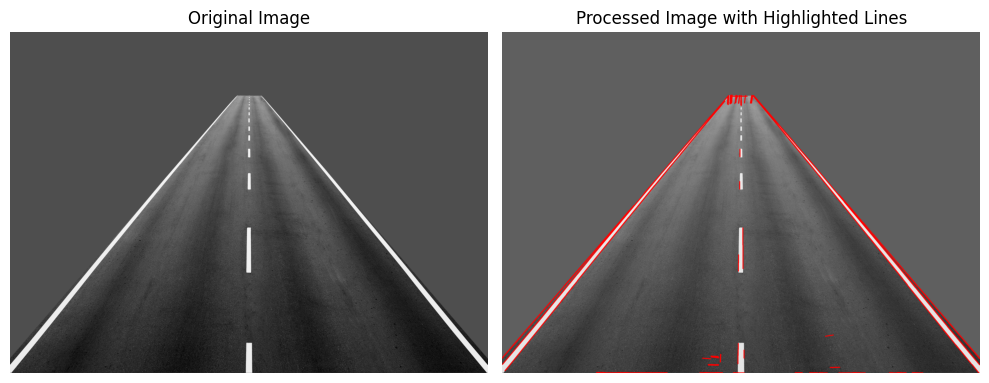

In [13]:
image2 = cv2.imread("/home/aniketh/Desktop/Sem_7/DIP/A4/Images/grayscale-image-q2.png", cv2.IMREAD_GRAYSCALE)

output = detect_and_highlight_lines(image2)

output_image_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 5))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title("Original Image")
plt.axis('off')
# Display processed image with highlighted lines
plt.subplot(1, 2, 2)
plt.imshow(output_image_rgb)
plt.title("Processed Image with Highlighted Lines")
plt.axis('off')

plt.tight_layout()
plt.show()

### Part - (c)

In [17]:
def detect_and_highlight_lines_experiment(image, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=10):

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150, apertureSize=3)
    
    # Convert the grayscale image to BGR for displaying lines in color
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Apply Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, rho=rho, theta=theta, threshold=threshold, 
                            minLineLength=minLineLength, maxLineGap=maxLineGap)
    
    # Draw the detected lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(color_image, (x1, y1), (x2, y2), (0, 0, 255), 5)  # Red lines
    
    return color_image


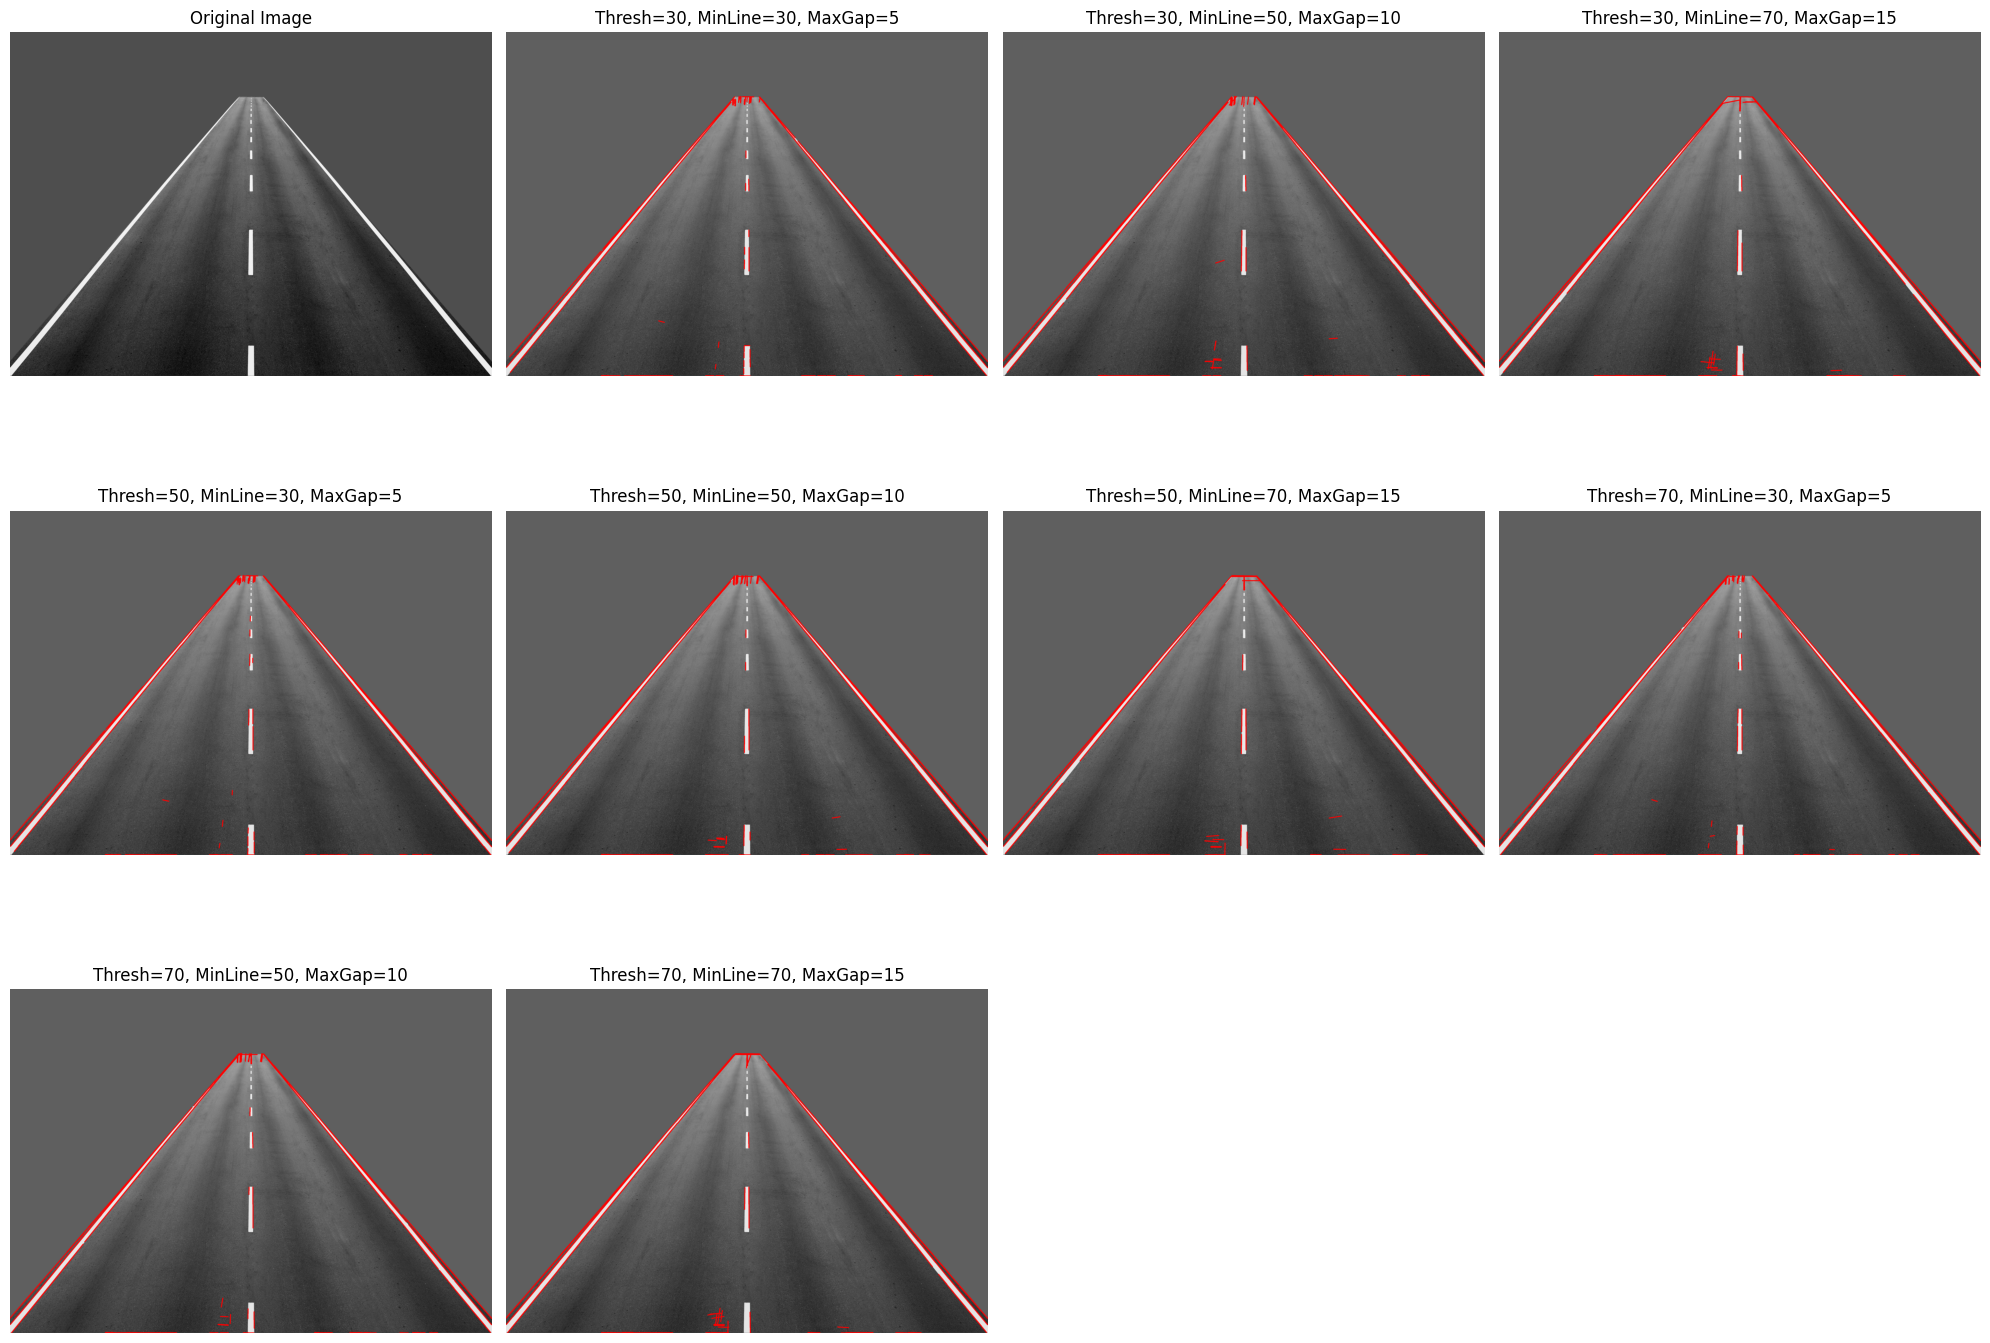

In [19]:
# Load the input image
input_image = cv2.imread("/home/aniketh/Desktop/Sem_7/DIP/A4/Images/grayscale-image-q2.png", cv2.IMREAD_GRAYSCALE)

extended_params = [
    {"threshold": 30, "minLineLength": 30, "maxLineGap": 5},
    {"threshold": 30, "minLineLength": 50, "maxLineGap": 10},
    {"threshold": 30, "minLineLength": 70, "maxLineGap": 15},
    {"threshold": 50, "minLineLength": 30, "maxLineGap": 5},
    {"threshold": 50, "minLineLength": 50, "maxLineGap": 10},
    {"threshold": 50, "minLineLength": 70, "maxLineGap": 15},
    {"threshold": 70, "minLineLength": 30, "maxLineGap": 5},
    {"threshold": 70, "minLineLength": 50, "maxLineGap": 10},
    {"threshold": 70, "minLineLength": 70, "maxLineGap": 15},
]

# Plot results
plt.figure(figsize=(20, 15))

# Display the original image in the first plot
plt.subplot(3, 4, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Loop through extended parameter combinations
for i, param in enumerate(extended_params):
    processed_image = detect_and_highlight_lines_experiment(
        input_image,
        threshold=param["threshold"],
        minLineLength=param["minLineLength"],
        maxLineGap=param["maxLineGap"],
    )
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

    # Plot each processed image
    plt.subplot(3, 4, i + 2)
    plt.imshow(processed_image_rgb)
    plt.title(f"Thresh={param['threshold']}, MinLine={param['minLineLength']}, MaxGap={param['maxLineGap']}")
    plt.axis('off')

plt.tight_layout()
plt.show()


The threshold decides how strong a line needs to be to get detected—higher values show fewer but clearer lines. The minLineLength sets the shortest line that can be detected, so increasing it removes tiny, broken lines. The maxLineGap fills gaps between line pieces, and bigger values join more pieces together but can make lines less accurate.

## Task - 3

### Part - (a)

In [20]:
def detect_circles(image, dp=1.2, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0):
    
    # Preprocessing: Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (9, 9), 2)
    
    # Apply Hough Circle Transform
    circles = cv2.HoughCircles(blurred_image, 
                               cv2.HOUGH_GRADIENT, 
                               dp=dp, 
                               minDist=minDist, 
                               param1=param1, 
                               param2=param2, 
                               minRadius=minRadius, 
                               maxRadius=maxRadius)
    
    # Convert the grayscale image to BGR for color display
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # If circles are detected, draw them
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # Circle center (x, y)
            radius = circle[2]              # Circle radius
            cv2.circle(output_image, center, radius, (0, 255, 0), 3)  # Green circle
            cv2.circle(output_image, center, 2, (0, 0, 255), 3)       # Red center dot
    
    return output_image

### Part - (b)

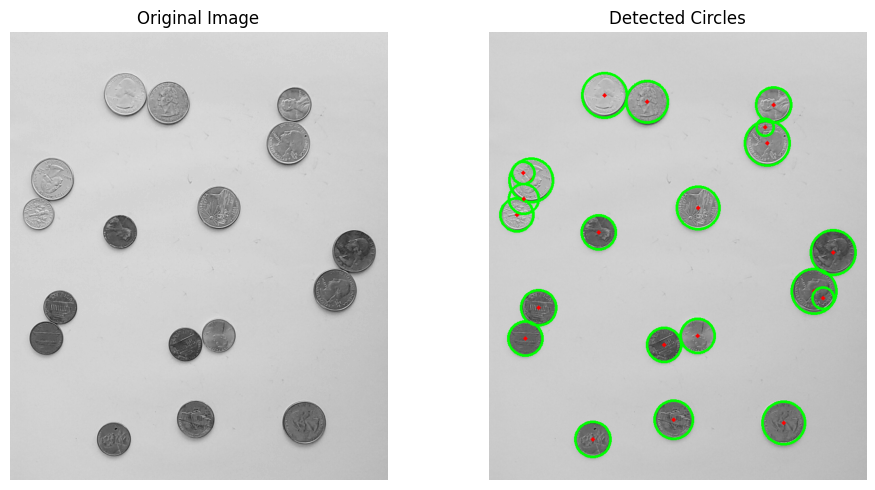

In [21]:
input_image = cv2.imread("/home/aniketh/Desktop/Sem_7/DIP/A4/Images/grayscale-coins.png", cv2.IMREAD_GRAYSCALE)

# Detect circles
result_image = detect_circles(input_image, dp=1.2, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=100)

# Display the original and result images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis('off')

plt.tight_layout()
plt.show()

### Part - (c)

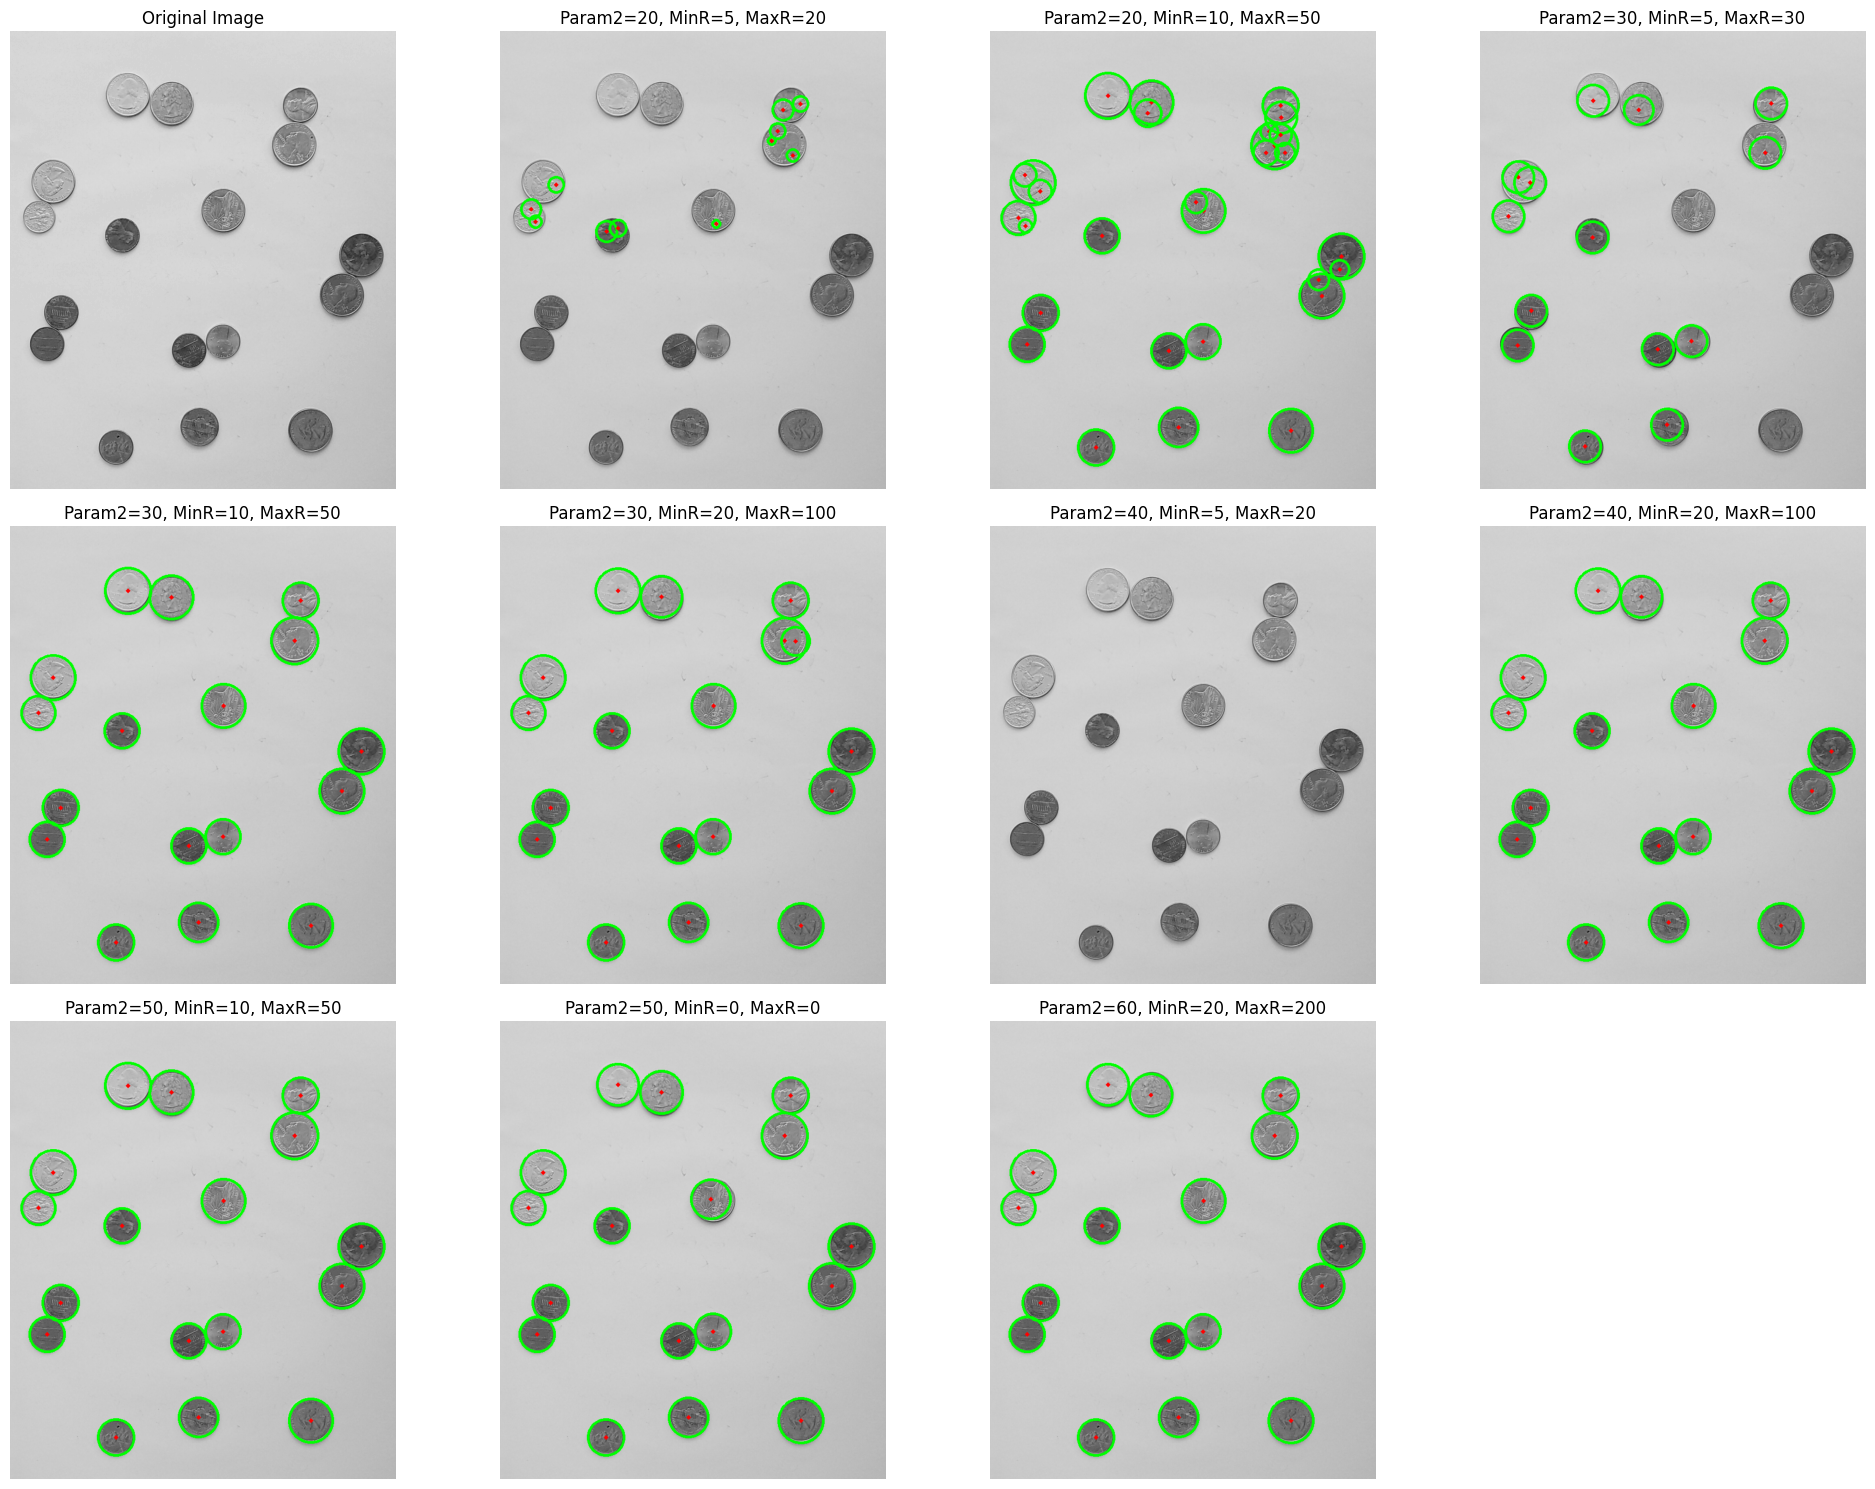

In [22]:
input_image = cv2.imread("/home/aniketh/Desktop/Sem_7/DIP/A4/Images/grayscale-coins.png", cv2.IMREAD_GRAYSCALE)

extended_parameter_sets = [
    {"param2": 20, "minRadius": 5, "maxRadius": 20},
    {"param2": 20, "minRadius": 10, "maxRadius": 50},
    {"param2": 30, "minRadius": 5, "maxRadius": 30},
    {"param2": 30, "minRadius": 10, "maxRadius": 50},
    {"param2": 30, "minRadius": 20, "maxRadius": 100},
    {"param2": 40, "minRadius": 5, "maxRadius": 20},
    {"param2": 40, "minRadius": 20, "maxRadius": 100},
    {"param2": 50, "minRadius": 10, "maxRadius": 50},
    {"param2": 50, "minRadius": 0, "maxRadius": 0},
    {"param2": 60, "minRadius": 20, "maxRadius": 200},
]

# Plot the results
plt.figure(figsize=(20, 15))

# Original image
plt.subplot(3, 4, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Processed images with different parameter sets
for i, params in enumerate(extended_parameter_sets):
    result_image = detect_circles(
        input_image,
        dp=1.2,
        minDist=20,
        param1=50,
        param2=params["param2"],
        minRadius=params["minRadius"],
        maxRadius=params["maxRadius"],
    )
    plt.subplot(3, 4, i + 2)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Param2={params['param2']}, MinR={params['minRadius']}, MaxR={params['maxRadius']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

- param2 (Threshold): Controls the sensitivity of circle detection

- minRadius & maxRadius: Define the size range of circles to detect

- dp : Affects the resolution of detection

- minDist: Ensures detected circles are sufficiently spaced apart


Experimenting with different param2, minRadius, and maxRadius values revealed that smaller radius ranges and lower thresholds help detect fine, small circles but may introduce false positives. Higher thresholds and larger radius ranges focus on clear, larger circles, but they might miss smaller or faint ones. Adjusting these values carefully gives the best results for the specific image.

## Task - 4

### Part - (a)

In [23]:
def detect_and_mark_corners(image, blockSize=2, ksize=3, k=0.04, threshold=0.01):

    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Harris Corner Detection
    harris_response = cv2.cornerHarris(image, blockSize, ksize, k)

    # Dilate the corner 
    harris_response = cv2.dilate(harris_response, None)

    # Threshold to mark corners
    output_image[harris_response > threshold * harris_response.max()] = [0, 0, 255]  # Red corners

    return output_image

### Part - (b)

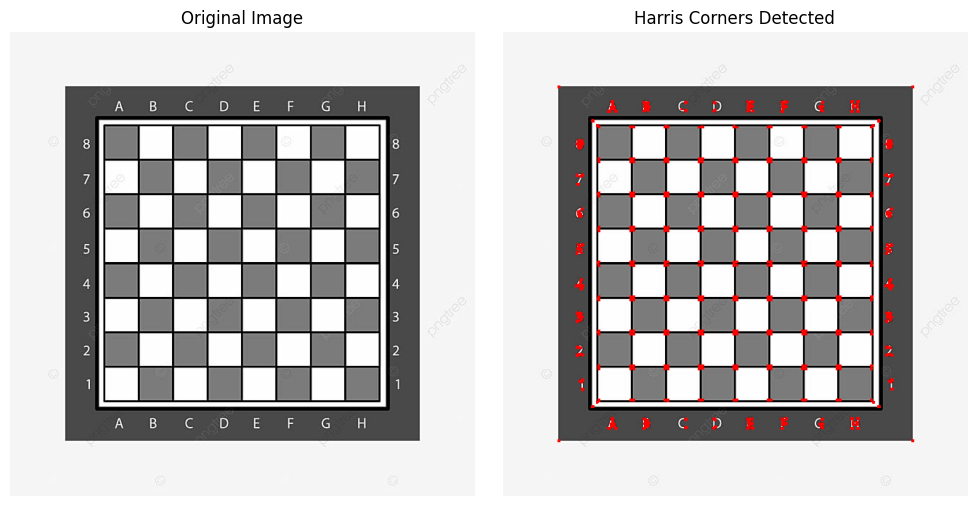

In [24]:
input_image = cv2.imread("/home/aniketh/Desktop/Sem_7/DIP/A4/Images/grayscale-chessboard.jpg",cv2.IMREAD_GRAYSCALE)

corners_marked_image = detect_and_mark_corners(input_image, blockSize=2, ksize=3, k=0.04, threshold=0.01)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corners_marked_image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners Detected")
plt.axis('off')

plt.tight_layout()
plt.show()

### Part - (c)

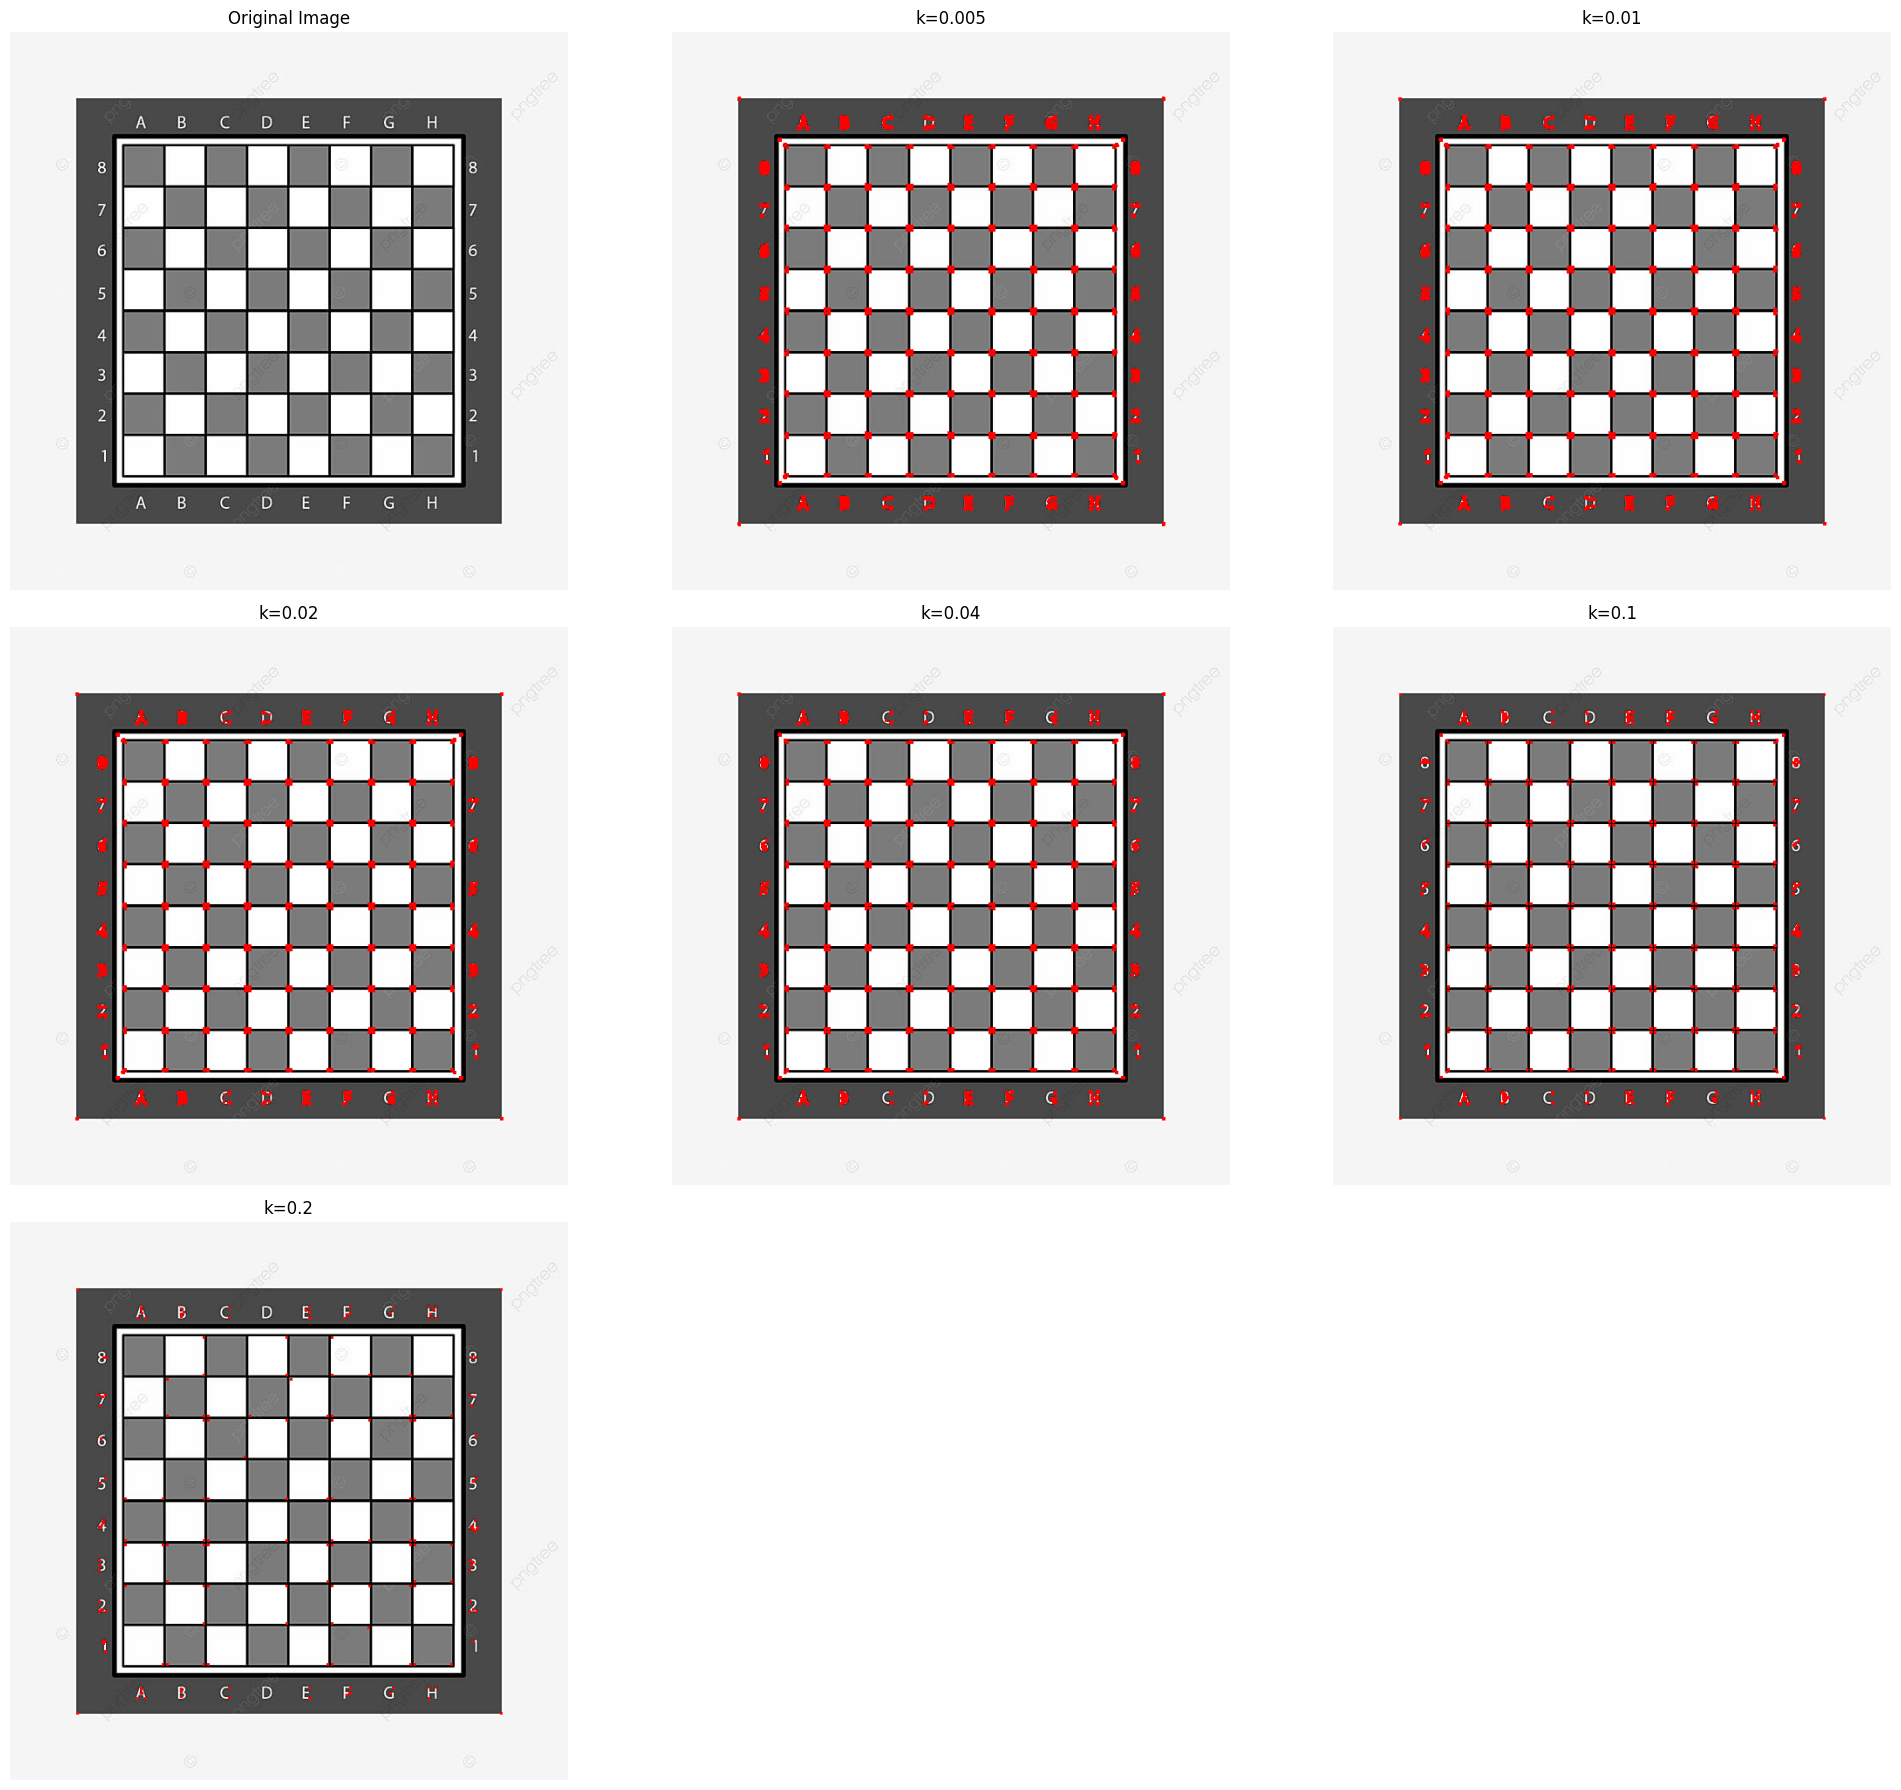

In [32]:
k_values = [0.005, 0.01, 0.02, 0.04, 0.1, 0.2]
input_image = cv2.imread("/home/aniketh/Desktop/Sem_7/DIP/A4/Images/grayscale-chessboard.jpg", cv2.IMREAD_GRAYSCALE)

input_image = np.uint8(input_image)  

total_plots = len(k_values) + 1

cols = 3  
rows = (total_plots + cols - 1) // cols  


plt.figure(figsize=(20, 6 * rows))
plt.subplot(rows, cols, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, k_value in enumerate(k_values):
    
    highlighted_image = detect_and_mark_corners(input_image, k=k_value)
    plt.subplot(rows, cols, i + 2)
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.title(f"k={k_value}")
    plt.axis('off')

plt.tight_layout()
plt.show()

When we change the sensitivity parameter k in the Harris Corner Detection method, it affects how many corners are detected. A smaller k will find more corners, including some weaker or less important ones, which can lead to more noise. A larger k will focus on the more noticeable and accurate corners but might miss some finer details. So, by adjusting k, we can find the right balance between detecting enough corners and getting clear results.

## Task - 5


- The Hough Transform detects lines and circles in different ways due to their unique shapes.

- When detecting lines, the algorithm uses a 2D parameter space with parameters like distance (ρ) and angle (θ). Each point in the image is transformed into a curve in this space, and the points that form a line in the image will intersect at a specific location in the parameter space.

- For circles, the Hough Transform works in a 3D parameter space, adding two more parameters: the circle's center coordinates (x, y) and its radius (r). This extra dimension increases the computational complexity, as it requires more calculations to identify circles compared to lines.

In summary, detecting circles is more computationally expensive than detecting lines due to the added parameters and the need to search through a larger parameter space.